In [1]:
from mnist_example import *

In [2]:
xd,yd,xt,yt = load_data()
BATCH = 128
EPOCH = 30

teacher = Model(build_teacher_model, "teacher", fn_compile)
student = Model(build_student_model, "student", fn_compile)

callbacks = [keras.callbacks.TensorBoard('logs')]
h1 = teacher.train(xd, yd, BATCH, EPOCH, callbacks, (xt,yt))
h2 = student.train(xd, yd, BATCH, EPOCH, callbacks, (xt,yt))

teacher.save()
student.save()

student2 = Model(build_student_model, "student2", fn_compile)
distill = Distill(teacher, student2, 10, 5.0, 0.07)
h3 = distill.teach(xd, yd, BATCH, EPOCH, callbacks, (xt,yt))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.3432 - acc: 0.9045 - val_loss: 0.1721 - val_acc: 0.9482
Epoch 2/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.1389 - acc: 0.9594 - val_loss: 0.1327 - val_acc: 0.9604
Epoch 3/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0979 - acc: 0.9701 - val_loss: 0.0980 - val_acc: 0.9704
Epoch 4/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.0756 - acc: 0.9767 - val_loss: 0.0898 - val_acc: 0.9728
Epoch 5/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.0614 - acc: 0.9814 - val_loss: 0.0820 - val_acc: 0.9740
Epoch 6/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0514 - acc: 0.9844 - val_loss: 0.0834 - val_acc: 0.9756
Epoch 7/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.0392 - acc: 0.9882 - val_loss: 0.0871 - val_acc

Epoch 30/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.0089 - acc: 0.9972 - val_loss: 0.1321 - val_acc: 0.9708
preprocessing data
Preprocessing done
preprocessing data
Preprocessing done
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.8617 - accuracy: 0.8560 - top_5_accuracy: 0.9821 - categorical_crossentropy: 0.6542 - soft_logloss: 0.8159 - val_loss: 0.5677 - val_accuracy: 0.9268 - val_top_5_accuracy: 0.9956 - val_categorical_crossentropy: 0.4622 - val_soft_logloss: 0.5354
Epoch 2/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.5517 - accuracy: 0.9329 - top_5_accuracy: 0.9967 - categorical_crossentropy: 0.4057 - soft_logloss: 0.5233 - val_loss: 0.5139 - val_accuracy: 0.9402 - val_top_5_accuracy: 0.9977 - val_categorical_crossentropy: 0.3565 - val_soft_logloss: 0.4889
Epoch 3/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.5017 

60000/60000 [==============================] - 4s 59us/step - loss: 0.3821 - accuracy: 0.9923 - top_5_accuracy: 1.0000 - categorical_crossentropy: 0.0242 - soft_logloss: 0.3804 - val_loss: 0.4012 - val_accuracy: 0.9756 - val_top_5_accuracy: 0.9994 - val_categorical_crossentropy: 0.1440 - val_soft_logloss: 0.3912
Epoch 26/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.3818 - accuracy: 0.9929 - top_5_accuracy: 1.0000 - categorical_crossentropy: 0.0231 - soft_logloss: 0.3802 - val_loss: 0.4008 - val_accuracy: 0.9756 - val_top_5_accuracy: 0.9996 - val_categorical_crossentropy: 0.1461 - val_soft_logloss: 0.3905
Epoch 27/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.3810 - accuracy: 0.9934 - top_5_accuracy: 1.0000 - categorical_crossentropy: 0.0214 - soft_logloss: 0.3795 - val_loss: 0.4006 - val_accuracy: 0.9749 - val_top_5_accuracy: 0.9994 - val_categorical_crossentropy: 0.1424 - val_soft_logloss: 0.3906
Epoch 28/30
60000/60000 [=========

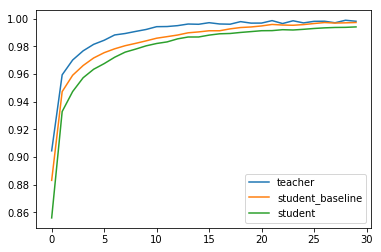

In [3]:
plt.plot(h1.history['acc'], label='teacher')
plt.plot(h2.history['acc'], label='student_baseline')
plt.plot(h3.history['accuracy'], label='student')
plt.legend()

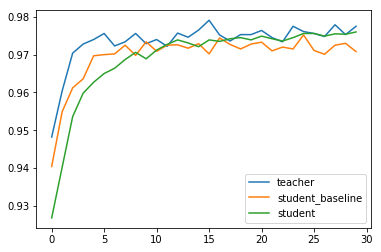

In [4]:
plt.plot(h1.history['val_acc'], label='teacher')
plt.plot(h2.history['val_acc'], label='student_baseline')
plt.plot(h3.history['val_accuracy'], label='student')
plt.legend()

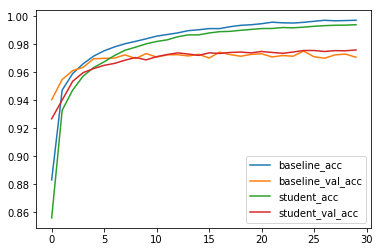

In [5]:
plt.plot(h2.history['acc'], label='baseline_acc')
plt.plot(h2.history['val_acc'], label='baseline_val_acc')
plt.plot(h3.history['accuracy'], label='student_acc')
plt.plot(h3.history['val_accuracy'], label='student_val_acc')
plt.legend()

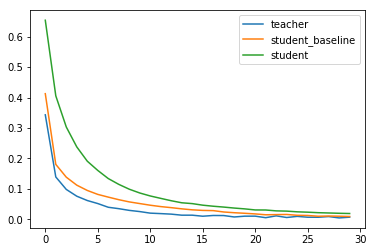

In [6]:
plt.plot(h1.history['loss'], label='teacher')
plt.plot(h2.history['loss'], label='student_baseline')
plt.plot(h3.history['categorical_crossentropy'], label='student')
plt.legend()

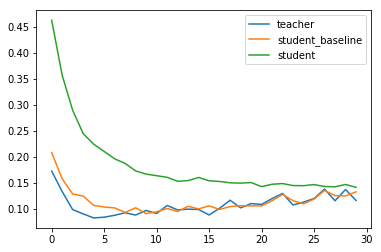

In [9]:
plt.plot(h1.history['val_loss'], label='teacher')
plt.plot(h2.history['val_loss'], label='student_baseline')
plt.plot(h3.history['val_categorical_crossentropy'], label='student')
plt.legend()

In [10]:
for h in [h1,h2,h3]:
    for key in h.history:
        print(key)
        print(h.history[key])
    print('////////')

val_loss
[0.1720644850730896, 0.1327367125749588, 0.09796889691799879, 0.08980101370736956, 0.08199785039573908, 0.08339009386301041, 0.08708425658605992, 0.09187241580113768, 0.08752479459848254, 0.09636368629001081, 0.09050146146543557, 0.105879471367097, 0.09741532828495837, 0.09886506497424562, 0.09817278330224218, 0.08763152049959172, 0.1005179530386522, 0.11604014325220487, 0.1013050823292695, 0.10954839059529349, 0.10797887673315709, 0.11920722384825713, 0.1290972811960557, 0.10676902226645943, 0.11241685490959517, 0.11932365050417684, 0.13745596801512838, 0.11493562850005119, 0.13663822290222744, 0.11565973889636588]
val_acc
[0.9482, 0.9604, 0.9704, 0.9728, 0.974, 0.9756, 0.9723, 0.9734, 0.9756, 0.9729, 0.974, 0.9722, 0.9757, 0.9746, 0.9765, 0.9791, 0.9752, 0.9736, 0.9753, 0.9753, 0.9764, 0.9745, 0.9734, 0.9775, 0.9761, 0.9756, 0.9748, 0.9779, 0.9753, 0.9775]
loss
[0.3431993787050247, 0.1388949003537496, 0.09787725129922231, 0.07560597924192747, 0.06141312335630258, 0.051438871